## Contents
- Preprocessing
    - Encoding categorical columns
    - Preprocessed data
    - Rescaling numerical columns
- Data
    - Dependent and independent variables
    - imensionality reduction: PCA, TSNE
    - Class imbalance: SMOTE
- Model.py
    - uilding model
    - Cross validation: KFold, StratifiedKfold
    - Evaluation metrics
    - Prediction
- Machine Learning model
    - Logistic Regression
    - XGBoost
    - CatBoost
    - Multi Layer Perceptron

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
# import the original dataset
df = pd.read_csv('../data/bank-addition-full-without-outliers.csv')
df.name = 'dataset'
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# create list containing categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# create list containing numerical columns
num_cols = ['duration', 'campaign', 'emp.var.rate',"pdays","age", 'cons.price.idx', 
            'cons.conf.idx', 'euribor3m', 'nr.employed', 'previous']

In [11]:
# Preprocessing - Using the new dataset i.e. data without outliers
# replacing basic.4y, basic.6y, basic.9y as basic
df['education'] = df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')
# defining output variable for classification
df['subscribed'] = (df.y == 'yes').astype('int')

In [6]:
# import library for preprocessing
from sklearn.preprocessing import StandardScaler

# import libraies for data manipulation
import pandas as pd

In [13]:
#encode categorical columns
encoded_data = pd.get_dummies(df[cat_cols], drop_first=False)

In [15]:
encoded_data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [20]:
 # adding the encoded columns to the dataframe
data = pd.concat([df,encoded_data], axis=1)
cat_cols_all = list(encoded_data.columns)
# creating a new dataframe with features and output
cols_input = num_cols + cat_cols_all
preprocessed_data = data[cols_input + ['subscribed']]

In [21]:
preprocessed_data.head()

,duration,campaign,emp.var.rate,pdays,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previous,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed
0,261.0,1.0,1.1,999.0,56.0,93.994,-36.4,4.857,5191.0,0.0,...,False,False,True,False,False,False,False,True,False,0
1,149.0,1.0,1.1,999.0,57.0,93.994,-36.4,4.857,5191.0,0.0,...,False,False,True,False,False,False,False,True,False,0
2,226.0,1.0,1.1,999.0,37.0,93.994,-36.4,4.857,5191.0,0.0,...,False,False,True,False,False,False,False,True,False,0
3,151.0,1.0,1.1,999.0,40.0,93.994,-36.4,4.857,5191.0,0.0,...,False,False,True,False,False,False,False,True,False,0
4,307.0,1.0,1.1,999.0,56.0,93.994,-36.4,4.857,5191.0,0.0,...,False,False,True,False,False,False,False,True,False,0


In [26]:
# rescale numerical columns
# creating an instance of the scaler object
scaler = StandardScaler()
preprocessed_data[num_cols] = scaler.fit_transform(preprocessed_data[num_cols])

In [27]:
preprocessed_data.head()

,duration,campaign,emp.var.rate,pdays,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previous,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed
0,0.443217,-0.838424,0.648092,0.0,1.707470,0.722722,0.968067,0.71246,0.33168,0.0,...,False,False,True,False,False,False,False,True,False,0
1,-0.379278,-0.838424,0.648092,0.0,1.810960,0.722722,0.968067,0.71246,0.33168,0.0,...,False,False,True,False,False,False,False,True,False,0
2,0.186187,-0.838424,0.648092,0.0,-0.258838,0.722722,0.968067,0.71246,0.33168,0.0,...,False,False,True,False,False,False,False,True,False,0
3,-0.364591,-0.838424,0.648092,0.0,0.051632,0.722722,0.968067,0.71246,0.33168,0.0,...,False,False,True,False,False,False,False,True,False,0
4,0.781027,-0.838424,0.648092,0.0,1.707470,0.722722,0.968067,0.71246,0.33168,0.0,...,False,False,True,False,False,False,False,True,False,0


## Data Loader

In [28]:
# import libraies for data manipulation
import pandas as pd

# import libraries for visualization
import matplotlib.pyplot as plt

# import library for splitting dataset
from sklearn.model_selection import train_test_split

# import library for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# import library for dealing with class imbalance
from imblearn.over_sampling import SMOTE

In [29]:
# get the dependent and independent variable
X = preprocessed_data.drop(columns=[ "subscribed", 'duration'])
y = preprocessed_data["subscribed"]

In [31]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (41188, 60)
y shape: (41188,)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state=1)
# printing the shape of training set
print(f'Train set X shape: {X_train.shape}')
print(f'Train set y shape: {y_train.shape}')
# printing the shape of test set
print(f'Test set X shape: {X_test.shape}')
print(f'Test set y shape: {y_test.shape}')

Train set X shape: (37069, 60)
Train set y shape: (37069,)
Test set X shape: (4119, 60)
Test set y shape: (4119,)


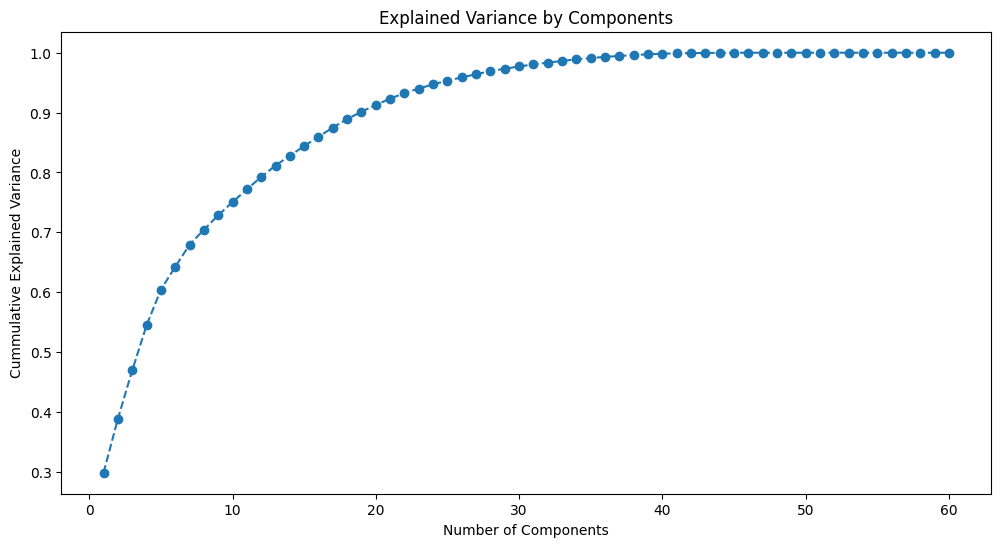

In [33]:
pca = PCA()
# fit pca to our data
pca.fit(X_train)
# saving the explained variance ratio
explained = pca.explained_variance_ratio_
# plot the cumulative variance explained by total number of components
plt.figure(figsize=(12,6))
plt.plot(range(1,61), explained.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')
plt.savefig('pca.png')
plt.show()

## Machine Learning Model

In [34]:
# function to reduce dimensions
def dimension_reduction(method, components, train_data, test_data):
    # PCA
    if (method == 'PCA'):
        pca = PCA(n_components=components)
        pca.fit(train_data)
        pca_train = pca.transform(train_data)
        X_train_reduced = pd.DataFrame(pca_train)
        print("original shape:   ", train_data.shape)
        print("transformed shape:", X_train_reduced.shape)
        print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
        # applying method transform to X_test
        pca_test = pca.transform(test_data)
        X_test_reduced = pd.DataFrame(pca_test)
        
    # TSNE
    elif (method == 'TSNE'):
        tsne = TSNE(n_components=components)
        tsne_train = tsne.fit_transform(train_data)
        X_train_reduced = pd.DataFrame(tsne_train)
        print("original shape:   ", train_data.shape)
        print("transformed shape:", X_train_reduced.shape)
        # applying method transform to X_test
        tsne_test = tsne.fit_transform(test_data)
        X_test_reduced = pd.DataFrame(tsne_test)
    
    else:
        print('Dimensionality reduction method not found!')
        
    return X_train_reduced, X_test_reduced

In [44]:
# function to deal with imbalanced class
def class_imbalance(X_data, y_data):
    # creating an instance
    sm = SMOTE(random_state=27)
    # applying it to the data
    X_train_smote, y_train_smote = sm.fit_resample(X_data, y_data)
    return X_train_smote, y_train_smote

In [36]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning model libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# import libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# import evaluation metrics
from sklearn.metrics import accuracy_score,recall_score,precision_recall_curve, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [47]:
# function to build machine learning models
def model(model, cv_method, metrics, X_train, X_test, y_train):
    if (model == 'LR'):
        # creating an instance of the regression
        model_inst = LogisticRegression()
        print('Logistic Regression\n----------------------')
    elif (model == 'XGB'):
        # creating an instance of the classifier
        model_inst = XGBClassifier()
        print('XGBoost\n----------------------')
    elif (model == 'MLP'):
        # creating an instance of the classifier
        model_inst = MLPClassifier()
        print('Multi Layer Perceptron\n----------------------')
    elif (model == 'SVM'):
        # creating an instance of the classifier
        kernel = input('Enter the kernel (rbf, linear, or poly):')
        model_inst = SVC(kernel=kernel, C=1.0)
        print('Support Vector Classification\n----------------------')
    
    # cross validation
    if (cv_method == 'KFold'):
        print('Cross validation: KFold\n--------------------------')
        cv = KFold(n_splits=10)
    elif (cv_method == 'StratifiedKFold'):
        print('Cross validation: StratifiedKFold\n--------------------------')
        cv = StratifiedKFold(n_splits=10)
    else:
        print('Cross validation method not found!')
    try:
        cv_scores = cross_validate(model_inst, X_train, y_train, 
                                   cv=cv, scoring=metrics)   
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('')
            
    except:
        metrics = ['accuracy', 'f1', 'precision', 'recall']
        cv_scores = cross_validate(model_inst, X_train, y_train, 
                                   cv=cv, scoring=metrics)
        # displaying evaluation metric scores
        cv_metric = cv_scores.keys()
        for metric in cv_metric:
            mean_score = cv_scores[metric].mean()*100
            print(metric+':', '%.2f%%' % mean_score)
            print('')

    return model_inst

In [38]:
# function to make predictions
def prediction(model, model_name, X_train, y_train, X_test, y_test):
    model_ = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #Get the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, fmt='.0f')
    plt.title(f'{model_name} Confusion Matrix')
    plt.savefig(f'conf_{model_name}.png')
    plt.show()

In [45]:
# dimensionality reduction
X_train_reduced, X_test_reduced = dimension_reduction('PCA', 20, X_train, X_test)

# dealing with imbalanced class
X_train_smote, y_train_smote = class_imbalance(X_train_reduced, y_train)

# machine learning model
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

original shape:    (37069, 60)
transformed shape: (37069, 20)
Explained variation per principal component: [0.29834778 0.08999165 0.08091808 0.07516737 0.05977391 0.03810317
 0.0370158  0.02483174 0.02439988 0.02195863 0.02116851 0.02086977
 0.01892647 0.01649268 0.01607366 0.01557347 0.0153918  0.01416898
 0.01227878 0.01122821]


Logistic Regression
----------------------
Cross validation: KFold
--------------------------


fit_time: 10.23%

score_time: 2.62%

test_accuracy: 70.74%

test_f1: 57.31%

test_precision: 61.98%

test_recall: 63.83%

test_roc_auc: nan%

Logistic Regression
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 9.72%

score_time: 2.58%

test_accuracy: 73.45%

test_f1: 70.78%

test_precision: 78.71%

test_recall: 64.31%

test_roc_auc: 79.01%



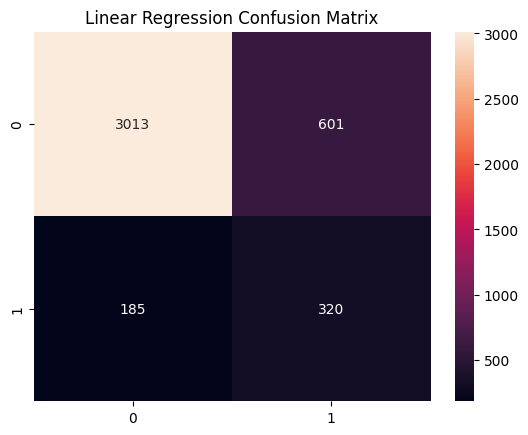

In [48]:
# 1. Logistic Regression
# KFold cross validation
model_res = model('LR', 'KFold', metrics, X_train_smote, X_test_reduced, y_train_smote)
# StratifiedKFold cross validation
model_res = model('LR', 'StratifiedKFold', metrics, X_train_smote, X_test_reduced, y_train_smote)
# make prediction
prediction(model_res, 'Linear Regression', X_train_smote, y_train_smote, X_test_reduced, y_test)

XGBoost
----------------------
Cross validation: KFold
--------------------------
fit_time: 111.41%

score_time: 4.93%

test_accuracy: 85.74%

test_f1: 71.92%

test_precision: 69.76%

test_recall: 78.43%

test_roc_auc: nan%

XGBoost
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 111.27%

score_time: 5.35%

test_accuracy: 87.52%

test_f1: 87.21%

test_precision: 88.69%

test_recall: 85.96%

test_roc_auc: 94.68%



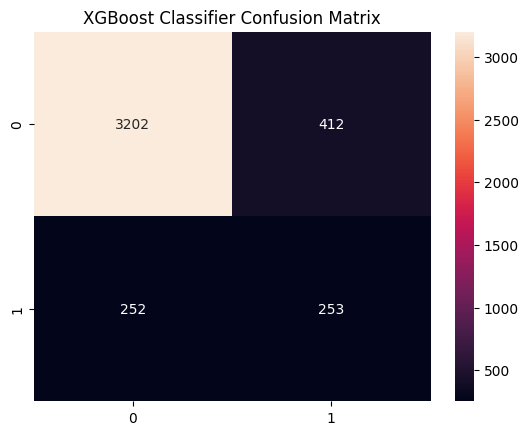

In [49]:
# 2. XGBoost
# KFold cross validation
model_res = model('XGB', 'KFold', metrics, X_train_smote, X_test_reduced, y_train_smote)
# StratifiedKFold cross validation
model_res = model('XGB', 'StratifiedKFold', metrics, X_train_smote, X_test_reduced, y_train_smote)
# make prediction
prediction(model_res, 'XGBoost Classifier', X_train_smote, y_train_smote, X_test_reduced, y_test)

Multi Layer Perceptron
----------------------
Cross validation: KFold
--------------------------
fit_time: 4498.43%

score_time: 2.80%

test_accuracy: 83.47%

test_f1: 67.53%

test_precision: 65.34%

test_recall: 75.26%

test_roc_auc: nan%

Multi Layer Perceptron
----------------------
Cross validation: StratifiedKFold
--------------------------
fit_time: 4391.32%

score_time: 2.55%

test_accuracy: 84.99%

test_f1: 84.72%

test_precision: 85.18%

test_recall: 84.61%

test_roc_auc: 92.67%



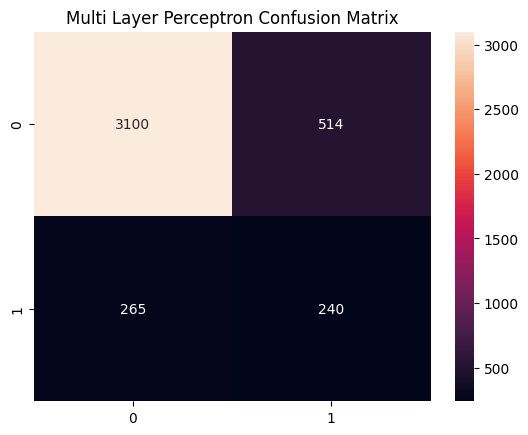

In [50]:
# 3. Multi Layer Perceptron
# KFold cross validation
model_res = model('MLP', 'KFold', metrics, X_train_smote, X_test_reduced, y_train_smote)
# StratifiedKFold cross validation
model_res = model('MLP', 'StratifiedKFold', metrics, X_train_smote, X_test_reduced, y_train_smote)
# make prediction
prediction(model_res, 'Multi Layer Perceptron', X_train_smote, y_train_smote, X_test_reduced, y_test)
